In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hotels = pd.read_excel('../data/HotelCustomersDataset.xlsx')

In [3]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Assingment 1: Bar Chart and Histogram

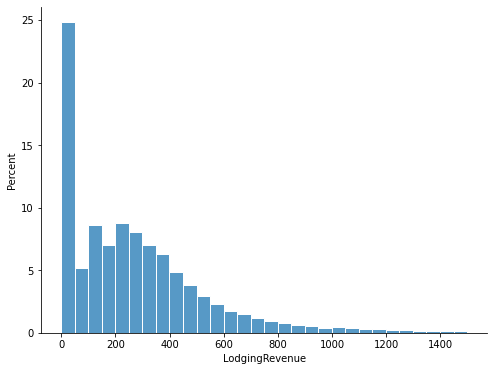

In [15]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.histplot(data=hotels.query('LodgingRevenue >= 0 & LodgingRevenue < 1500'),
             x = 'LodgingRevenue',
             bins = 30,
             edgecolor = 'white',
             stat='percent')

sns.despine()
plt.show()

In [4]:
top5 = ['GBR', 'PRT', 'FRA', 'DEU', 'ESP']

top5_countries = hotels.query('Nationality in @top5')

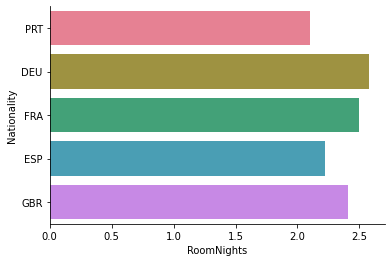

In [27]:
sns.barplot(
    data = top5_countries,
    x = 'RoomNights',
    y = 'Nationality',
    ci = None,
    palette='husl'
)

sns.despine()

plt.show()

## Violin plot assignment

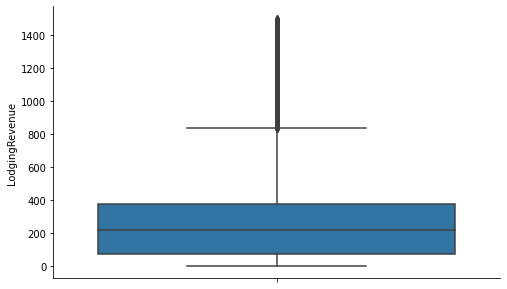

In [29]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(
    data = top5_countries.query('LodgingRevenue < 1500'),
    y = 'LodgingRevenue'
)

sns.despine()

plt.show()

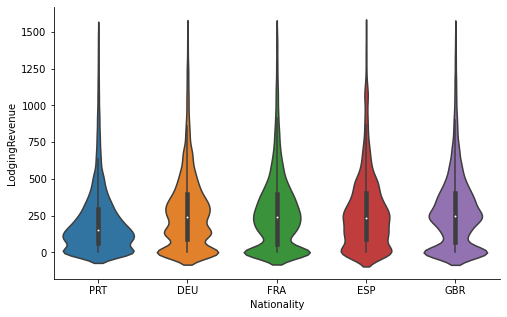

In [31]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.violinplot(
    x = 'Nationality',
     y = 'LodgingRevenue',
     data = top5_countries.query('LodgingRevenue < 1500')
)

sns.despine()

plt.show()

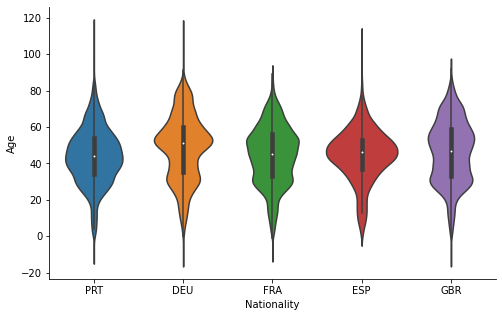

In [32]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.violinplot(
    x = 'Nationality',
     y = 'Age',
     data = top5_countries
)

sns.despine()

plt.show()

## Assignment 3: Linear relationship plots

<AxesSubplot:xlabel='RoomNights', ylabel='LodgingRevenue'>

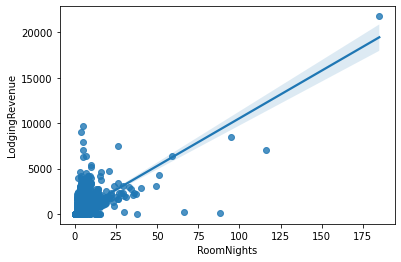

In [5]:
sns.regplot(
    data = top5_countries,
    x = 'RoomNights',
    y = 'LodgingRevenue'
)

<AxesSubplot:xlabel='RoomNights', ylabel='LodgingRevenue'>

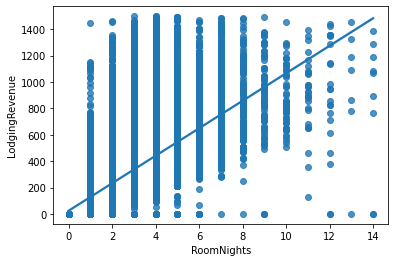

In [7]:
sns.regplot(
    data = top5_countries.query('LodgingRevenue < 1500 and RoomNights < 15'),
    x = 'RoomNights',
    y = 'LodgingRevenue'
)

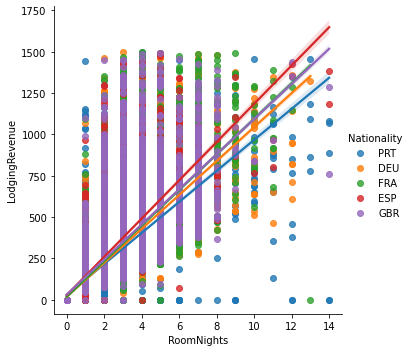

In [8]:
sns.lmplot(
    data = top5_countries.query('LodgingRevenue < 1500 and RoomNights < 15'),
    x = 'RoomNights',
    y = 'LodgingRevenue',
    hue = 'Nationality'
)

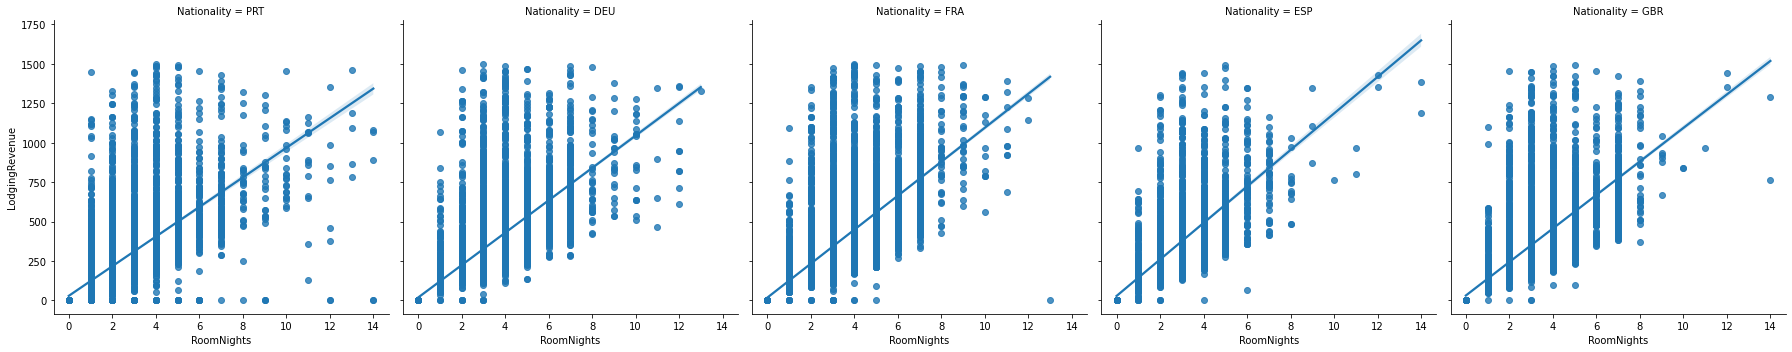

In [10]:
sns.lmplot(
    data = top5_countries.query('LodgingRevenue < 1500 and RoomNights < 15'),
    x = 'RoomNights',
    y = 'LodgingRevenue',
    col = 'Nationality'
)

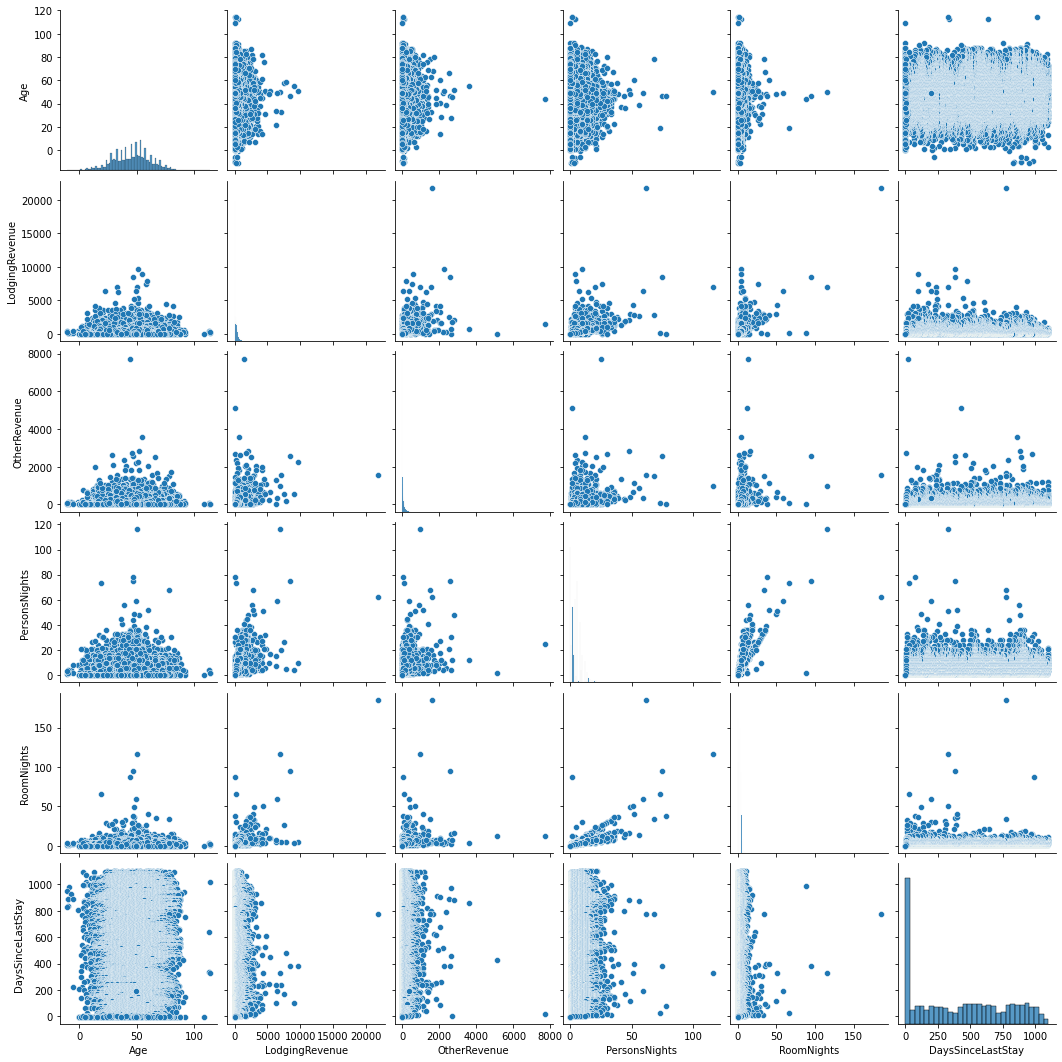

In [9]:
sns.pairplot(top5_countries.iloc[:, [2, 5, 6, 10, 11, 12]])

# Heatmaps

In [11]:
hotels_pivot = (
    top5_countries
    .pivot_table(
        index = 'Nationality',
        columns = 'MarketSegment',
        values = {"LodgingRevenue":'mean'}
    )
)

<AxesSubplot:xlabel='MarketSegment', ylabel='Nationality'>

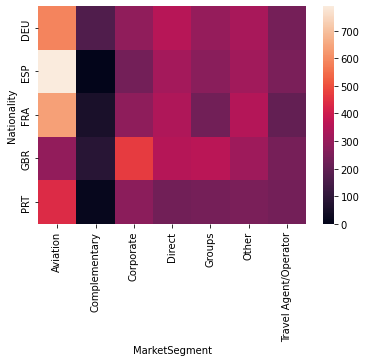

In [12]:
sns.heatmap(hotels_pivot.droplevel(0, axis = 1))

<AxesSubplot:>

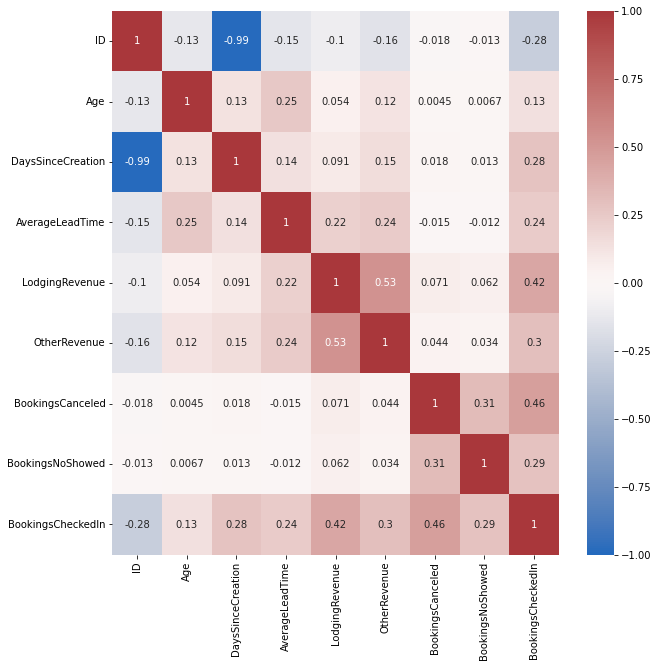

In [14]:
fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(
    hotels.iloc[:, :10].corr(),
    annot=True,
    cmap='vlag',
    vmin = -1, 
    vmax = 1
)